# titanic

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
print(df.shape)

(891, 15)


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.dropna(inplace=True) # delete null datas

In [11]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

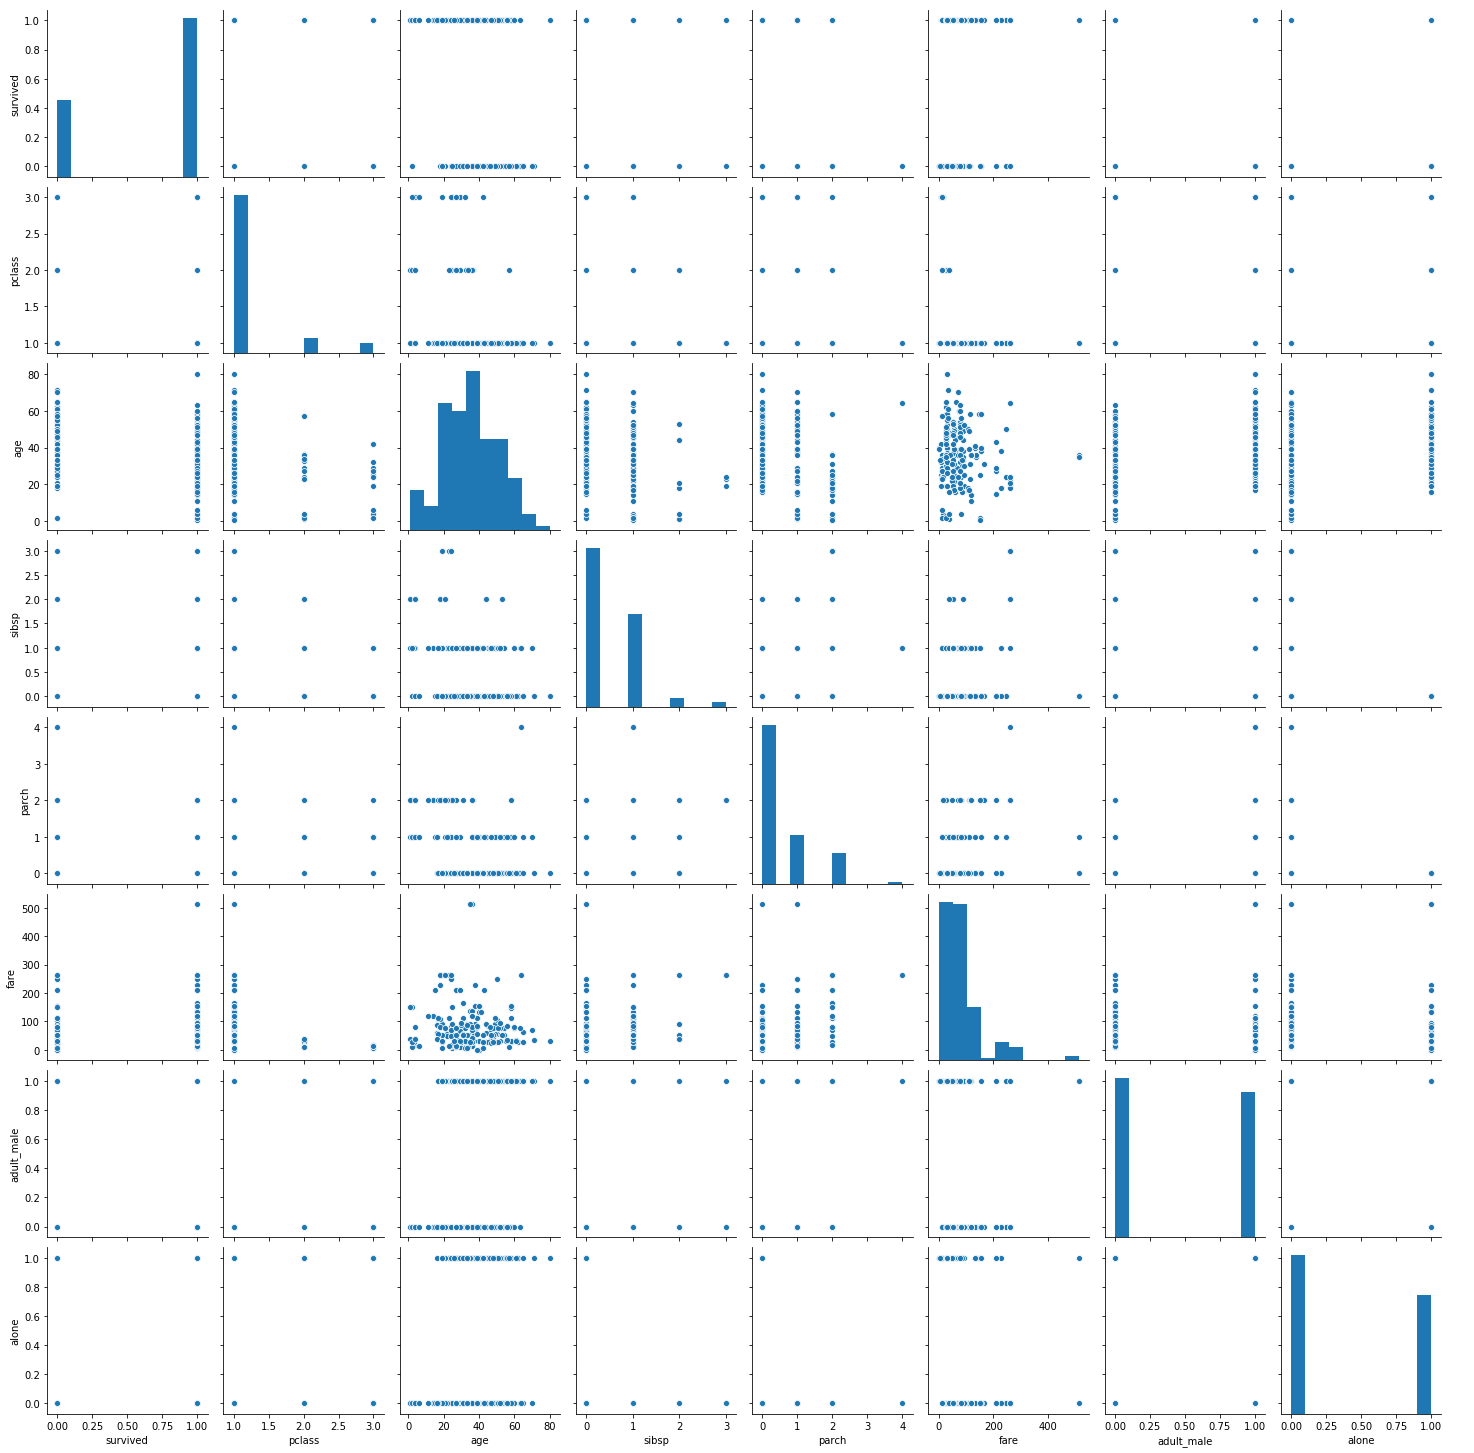

In [12]:
sns.pairplot(df)

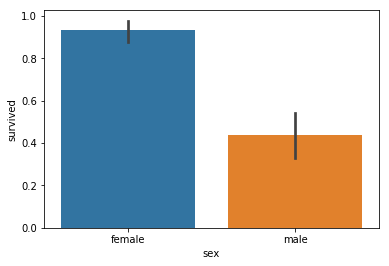

In [13]:
sns.barplot(x='sex', y='survived', data=df) # estimator = mean (average)

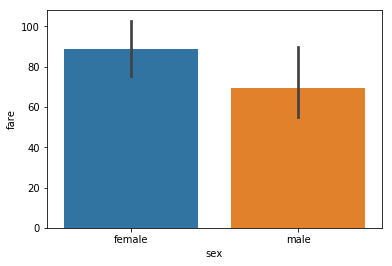

In [14]:
sns.barplot(x='sex', y='fare', data=df)

In [15]:
groupedvalues = df.groupby('sex').sum().reset_index()
groupedvalues.head()

,sex,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,female,82,107,2875.50,47,48,7832.0792,0.0,32.0
1,male,41,110,3607.92,38,39,6531.3126,87.0,46.0


0 82
1 41


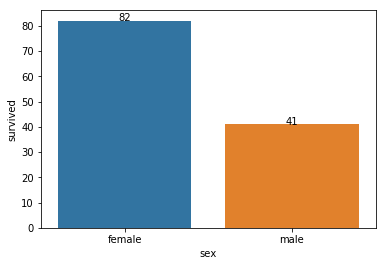

In [16]:
g = sns.barplot(x='sex', y='survived', data=groupedvalues)

for index, row in groupedvalues.iterrows():
    print(row.name, row.survived)
    g.text(row.name, row.survived, round(row.survived, 2), color='black', ha="center")

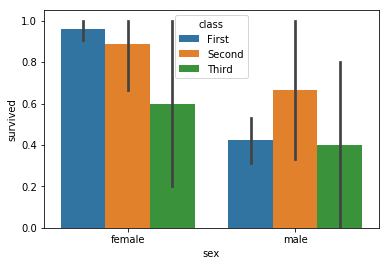

In [17]:
g = sns.barplot(x='sex', y='survived', hue='class', data=df)

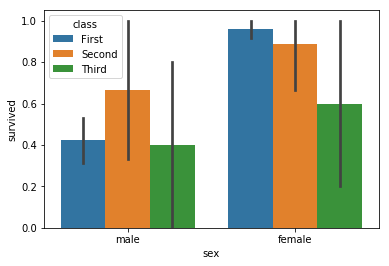

In [18]:
g = sns.barplot(x='sex', y='survived', hue='class', order = ['male', 'female'], data=df)

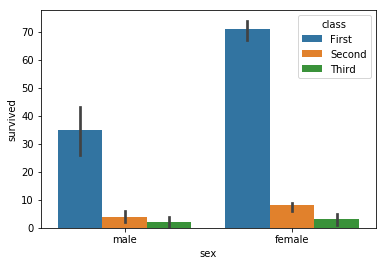

In [20]:
g = sns.barplot(x='sex', y='survived', hue='class', order = ['male', 'female'], estimator = sum, data=df)

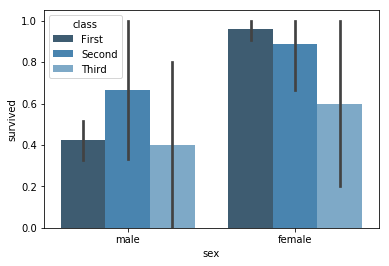

In [21]:
g = sns.barplot(x='sex', y='survived', hue='class', order = ['male', 'female'], palette = "Blues_d", data=df)

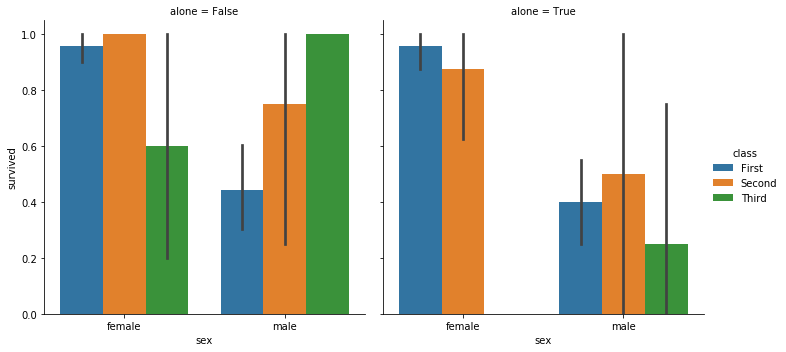

In [27]:
sns.catplot(x='sex', y='survived', hue='class', col="alone", data=df, kind="bar")

In [29]:
print(df.sex.unique())

['female' 'male']


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()
dfi['sex'] = label_encoder.fit_transform(dfi['sex'])
print(dfi['sex'].unique())

[0 1]
